In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [251]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [252]:
# lets remove the irrelevant column from the dataset and chheck for the null values
data = data.drop(columns ='Loan_ID')
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can there are couple of null values in the dataset so we will fill it after ding analysis

In [253]:
# lets check the datatypes of each columns
data.info()

data['Credit_History'] = data['Credit_History'].astype('O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


As we cacn see the data set have both categorcial and contineous data

In [254]:
# lets create a list of categorical and contineous data
cat_col = []
cont_col = []

for i in data.columns:
    if data[i].dtypes == object:
        cat_col.append(i)
    else:
        cont_col.append(i)
        
print('cat colum --',cat_col)
print('cont colum --',cont_col)

cat colum -- ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
cont colum -- ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


# EDA

Percent of male getting loan 69.32515337423312
Percent of Female getting loan 66.96428571428571


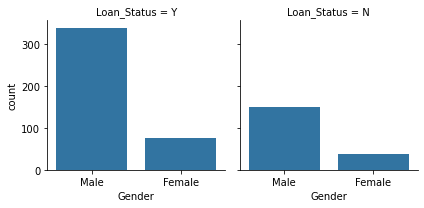

In [255]:
print('Percent of male getting loan',data[data.Loan_Status =='Y'].Gender.value_counts()[0] / data.Gender.value_counts()[0]*100)
print('Percent of Female getting loan',data[data.Loan_Status =='Y'].Gender.value_counts()[1] / data.Gender.value_counts()[1]*100)

grid = sns.FacetGrid(data,col='Loan_Status')
grid.map(sns.countplot, 'Gender')

Although we can see that the number of female applying for the loan are comparatively less than male, but when we check the conversion rate we can see that around 67% of the female who are applying for the loan are getting the loan, wheras for the male this figure is around 69%

Percent of Non self employed people getting loan 68.60000000000001
Percent of self employed people getting loan 68.29268292682927


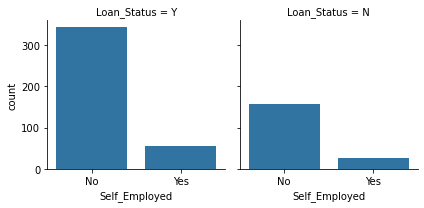

In [257]:
# lets check the same statistcs for married people
print('Percent of Non self employed people getting loan',data[data.Loan_Status =='Y'].Self_Employed.value_counts()[0] / data.Self_Employed.value_counts()[0]*100)
print('Percent of self employed people getting loan',data[data.Loan_Status =='Y'].Self_Employed.value_counts()[1] / data.Self_Employed.value_counts()[1]*100)

grid = sns.FacetGrid(data,col='Loan_Status')
grid.map(sns.countplot, 'Self_Employed')

Although, we can see that the number of self employed applicants are very less, we can see that chances of getting the loan are almost similar for self employed and salaried people 

Percent of Graduate getting loan 70.83333333333334
Percent of Non Graduate getting loan 61.19402985074627


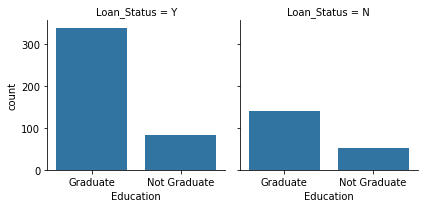

In [258]:
# lets see how the education is impacting the loan application

print('Percent of Graduate getting loan',data[data.Loan_Status =='Y'].Education.value_counts()[0] / data.Education.value_counts()[0]*100)
print('Percent of Non Graduate getting loan',data[data.Loan_Status =='Y'].Education.value_counts()[1] / data.Education.value_counts()[1]*100)

grid = sns.FacetGrid(data,col='Loan_Status')
grid.map(sns.countplot, 'Education')

As expected, graduate people are more likely to get the loan as compared to get he job as compared to Non graduate, this maybe because the average salary earned by the graduate candidate will be higher than that of non graudate candidate,

lets visualize this and confirm this in next graph

avg Income of Graduate people -- 5857.433333333333
avg Income of Non Graduate people -- 3777.283582089552


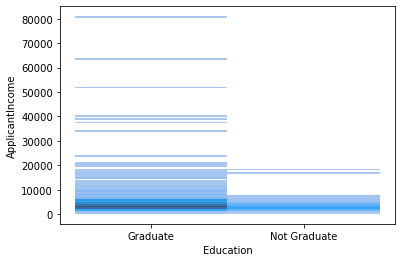

In [259]:
#lets see how the distance from home impacts the attrition
print('avg Income of Graduate people --',data[data['Education']=='Graduate']['ApplicantIncome'].mean())
print('avg Income of Non Graduate people --',data[data['Education']=='Not Graduate']['ApplicantIncome'].mean())
sns.histplot(x=data['Education'],y=data['ApplicantIncome'],data=data)
plt.show()

based on the above data we can say that salary of most Non graduate candidate are concentrated between 0 and 10000, on the other hand, most of gRduate are earning between 0 and 20000 and some of them are earning as much as 50000-60000

However, on the above statistics we can see that there is no connection between income and loan status, because the average income of people not getting loan are actually higher than people who are getting loan  

avg loan amount getting Approved -- 144.29440389294405
avg loan amount not getting Approved -- 151.22099447513813


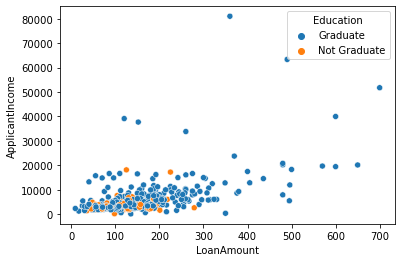

In [260]:
print('avg loan amount getting Approved --',data[data['Loan_Status']=='Y']['LoanAmount'].mean())
print('avg loan amount not getting Approved --',data[data['Loan_Status']=='N']['LoanAmount'].mean())
sns.scatterplot(x=data['LoanAmount'],y=data['ApplicantIncome'],data=data,hue='Education')
plt.show()

From the above statistics and scatter plot we can noticed that people with higher income are tends to demand higher loan amount and from the staticts we can confirm bank is very likely to approve the loan with lower amount, so this misght be the reason we havent seen any connection between the Income and loan status 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

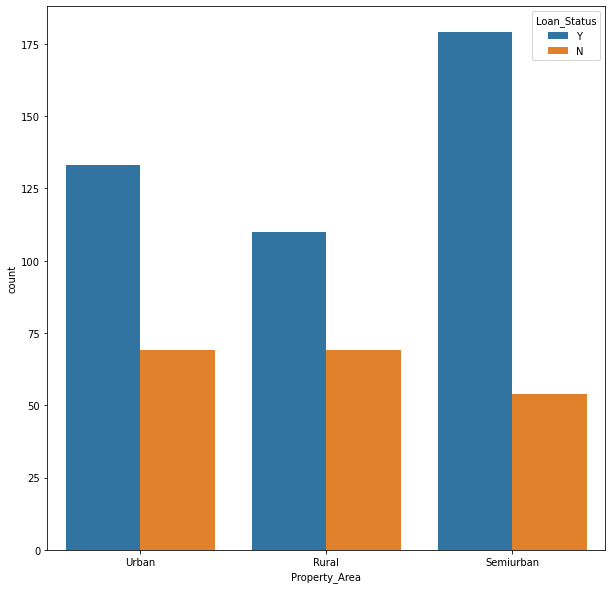

In [261]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Property_Area'],data=data,hue='Loan_Status')

From the above countplot we can see that candidates from semiurban areas are most likely to get the loan followed by urban area and rural area 

In [262]:
# now lets add some condtional column to do more data analysis
# adding cateory column to see if the co-applicnt is earning nor not
data['Multi_income'] = np.where(data['CoapplicantIncome'] == 0, 'No','Yes')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Multi_income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,No
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Yes
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,No
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Yes
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,No
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,No
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Yes
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,No


In [263]:
data['Multi_income'].value_counts() / data['Multi_income'].value_counts().sum()*100

Yes    55.537459
No     44.462541
Name: Multi_income, dtype: float64

Based on the above statistics, around 55% of the total applicant have multiple income  (appicant income and coapplicant income) and around 45% of applicant have single income 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

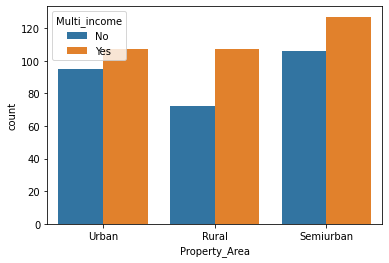

In [264]:
sns.countplot(x=data['Property_Area'],data=data,hue='Multi_income')

As we can see people living in urban area are more likely to use co-applicant with income to support their loan application, maybe because the expense in urban is comparatively high so to make the application strong they might have included their co-applicant income to increase the chances of getting the loan

lets confirm this in further analysis

Percent of multi-income app. getting loan 71.8475073313783
Percent of single income app. getting loan 64.83516483516483


<AxesSubplot:xlabel='Multi_income', ylabel='count'>

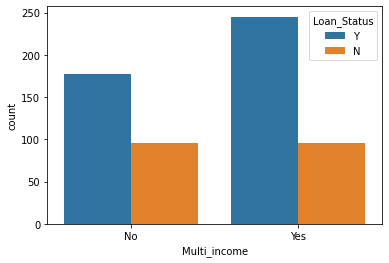

In [265]:
print('Percent of multi-income app. getting loan',data[data.Loan_Status =='Y'].Multi_income.value_counts()[0] / data.Multi_income.value_counts()[0]*100)
print('Percent of single income app. getting loan',data[data.Loan_Status =='Y'].Multi_income.value_counts()[1] / data.Multi_income.value_counts()[1]*100)

sns.countplot(x=data['Multi_income'],data=data,hue='Loan_Status')

based on the above statistcs we can confirm that the chances of getting the loan is 65% if the co-applicant is not earning, however if the applicant is showing the co-applicant income, their chances increases signifcantly from 65% to 72%

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

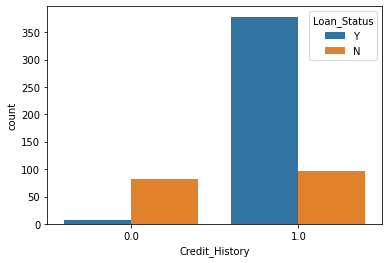

In [266]:
sns.countplot(x=data['Credit_History'],data=data,hue='Loan_Status')

when we are comparing credit history and loan status we can see that credit history is very important factor to be consider while granting a loan, it means that if the appliacnt have good credit history than it is very likely that he will be given a loan

######## Now lets see how the data is distributed in categorical data

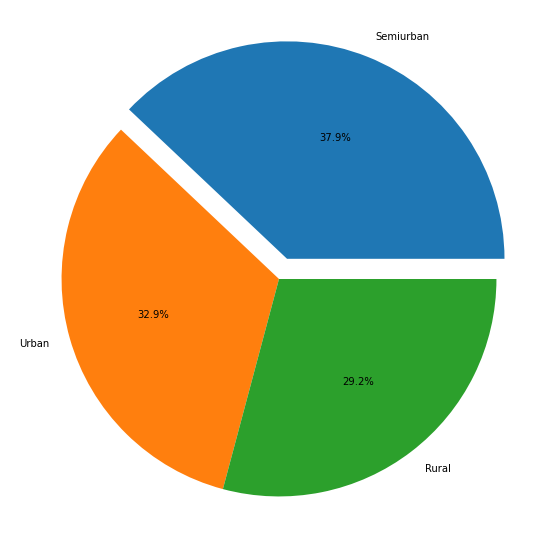

In [267]:
x = data['Property_Area'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(data['Property_Area'].value_counts(), labels = x,explode = [.1,0,0],autopct='%1.1f%%')#
plt.show()

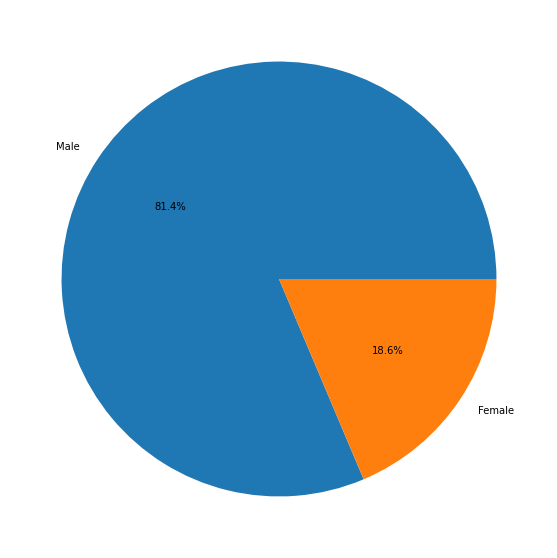

In [268]:
x = data['Gender'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(data['Gender'].value_counts(), labels = x,autopct='%1.1f%%')#
plt.show()

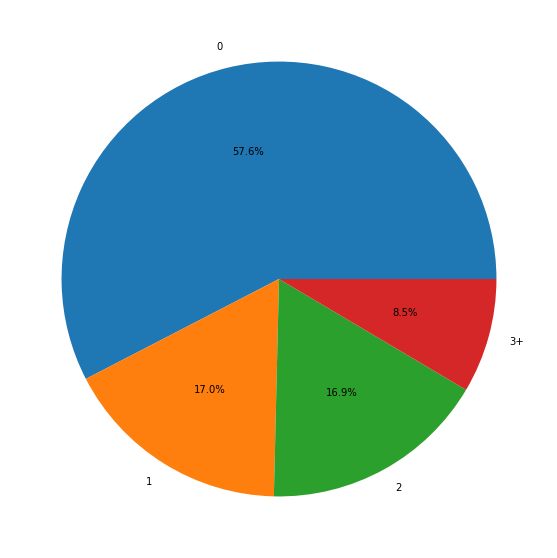

In [269]:
x = data['Dependents'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(data['Dependents'].value_counts(), labels = x,autopct='%1.1f%%')#
plt.show()

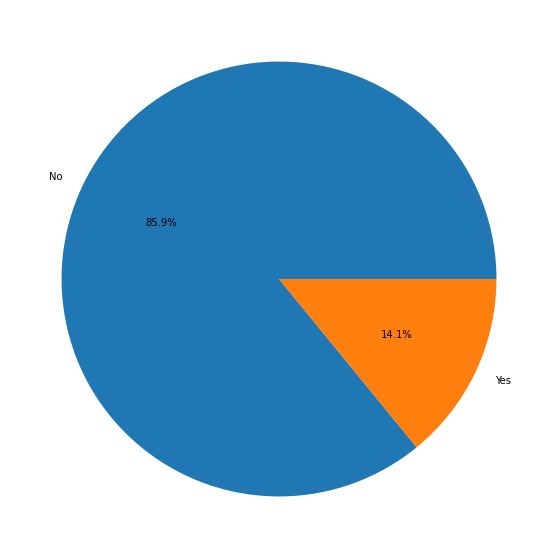

In [270]:
x = data['Self_Employed'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(data['Self_Employed'].value_counts(), labels = x,autopct='%1.1f%%')#
plt.show()

From the following Pie charts these are our observation:

Property are = as we can see that around 38% of the population beongs to semi urban popluation followed by urban and rural ares

depandant = more than half of the appliant doesnt have any depandant and only 8.5% of the applcant have more than 3 depandants

Gender = around 85% of the applicant are male

Self Employed = 86% percant of the applicant are salaried class people and only 14% of the applicant belongs to self employed class

# Data Preprocessing

In [271]:
# Lets check the null values

print(data.isna().sum() / data.shape[0]*100)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
Multi_income         0.000000
dtype: float64


only 8% of the are missing and also the dataset is imbalance so we will be upscaling the data, so for know I will be delting the records with the null values

In [272]:
data = data.dropna()
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Multi_income
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Yes
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,No
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Yes
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,No
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,No
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,No
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Yes
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,No


In [274]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Multi_income         0
dtype: int64

we have successfully removed all the null values

Y    332
N    148
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

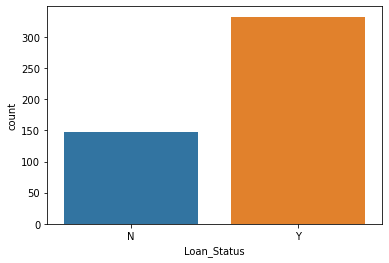

In [275]:
# now check if the data is balanced
print(data['Loan_Status'].value_counts())
sns.countplot(x=data['Loan_Status'], data=data)

# data is imbalanced, so we well balance the dataset using resampling technique

In [276]:
# as the data is unbalanced we will be balancing the dataset using resampling techniques
from sklearn.utils import resample
## 
data_yes = data[data.Loan_Status=='Y']
data_no = data[data.Loan_Status=='N']

data_no = resample(data_no,replace=True,n_samples=280,random_state=25)

data = pd.concat([data_yes,data_no])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Multi_income
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,No
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Yes
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,No
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Yes
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N,No
300,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban,N,Yes
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,Yes
384,Male,Yes,2,Graduate,No,4566,0.0,100.0,360.0,1.0,Urban,N,No


Y    332
N    280
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

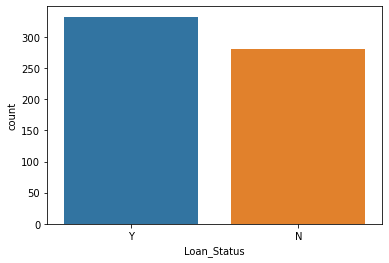

In [277]:
print(data['Loan_Status'].value_counts())
sns.countplot(x=data['Loan_Status'], data=data)

we have successfully, balanced the dataset

In [291]:
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


#### encoding the data

In [293]:
from sklearn.preprocessing import LabelEncoder

data[cat_col[0]] = LabelEncoder().fit_transform(data[cat_col[0]])
data[cat_col[1]] = LabelEncoder().fit_transform(data[cat_col[1]])
data[cat_col[2]] = LabelEncoder().fit_transform(data[cat_col[2]])
data[cat_col[3]] = LabelEncoder().fit_transform(data[cat_col[3]])
data[cat_col[4]] = LabelEncoder().fit_transform(data[cat_col[4]])
data[cat_col[5]] = LabelEncoder().fit_transform(data[cat_col[5]])
data[cat_col[6]] = LabelEncoder().fit_transform(data[cat_col[6]])
data[cat_col[7]] = LabelEncoder().fit_transform(data[cat_col[7]])

# we have encoded the data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Multi_income
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,No
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,Yes
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1,No
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1,Yes
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1,2,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,0,0,0,0,3600,0.0,80.0,360.0,1,2,0,No
300,1,1,0,1,0,1800,2934.0,93.0,360.0,0,2,0,Yes
34,1,0,3,0,0,12500,3000.0,320.0,360.0,1,0,0,Yes
384,1,1,2,0,0,4566,0.0,100.0,360.0,1,2,0,No


In [295]:
# now I will delete the column we have created fro EDA purpose
data = data.drop(columns='Multi_income')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,0,0,0,0,3600,0.0,80.0,360.0,1,2,0
300,1,1,0,1,0,1800,2934.0,93.0,360.0,0,2,0
34,1,0,3,0,0,12500,3000.0,320.0,360.0,1,0,0
384,1,1,2,0,0,4566,0.0,100.0,360.0,1,2,0


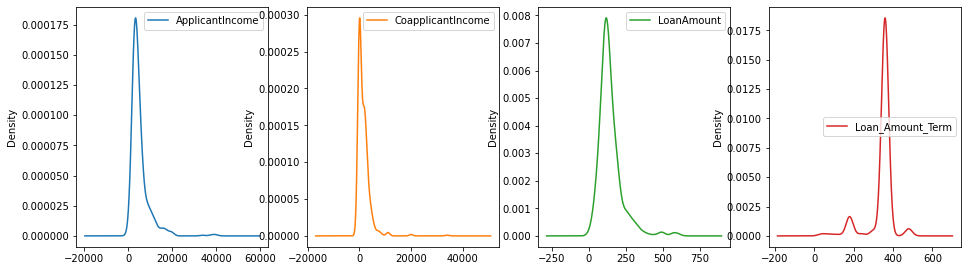

In [302]:
# lets see how the data is distributed for contineous column

data[cont_col].plot(kind='density',subplots=True,sharex=False,figsize=(20,15),layout=(3,5))
plt.show()

as we can see there is a skewness in all the contineous, now lets check for the outlier

<AxesSubplot:>

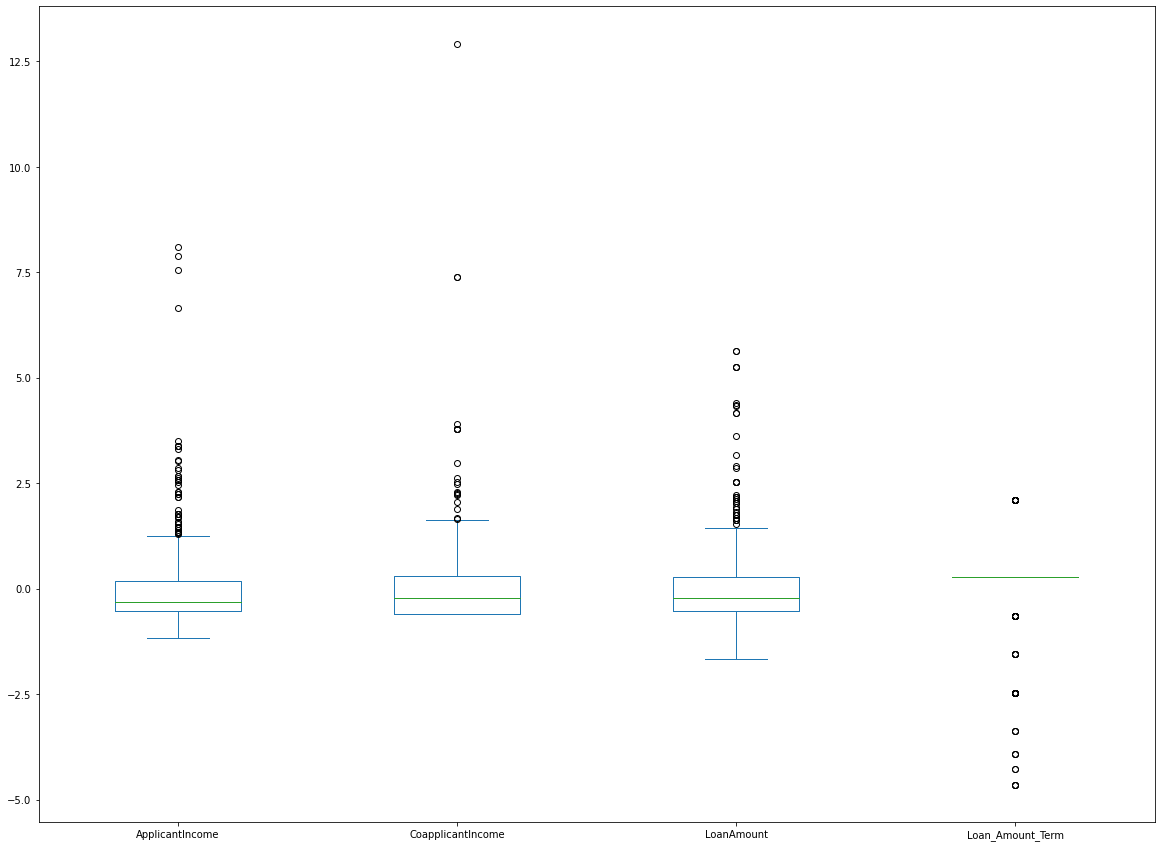

In [303]:
from scipy.stats import zscore

zscore(data[cont_col]).plot(kind='box',figsize=(20,15))

as we can see from the above box plot we have so many outliers we weill remove the outliers first and then see what the data looks like

In [304]:
# we will use zscore to remove the outlier from the data

z_score= np.abs(zscore(data[cont_col]))

data = data[(z_score<3).all(axis=1)]
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,0,0,0,0,3600,0.0,80.0,360.0,1,2,0
300,1,1,0,1,0,1800,2934.0,93.0,360.0,0,2,0
34,1,0,3,0,0,12500,3000.0,320.0,360.0,1,0,0
384,1,1,2,0,0,4566,0.0,100.0,360.0,1,2,0


<AxesSubplot:>

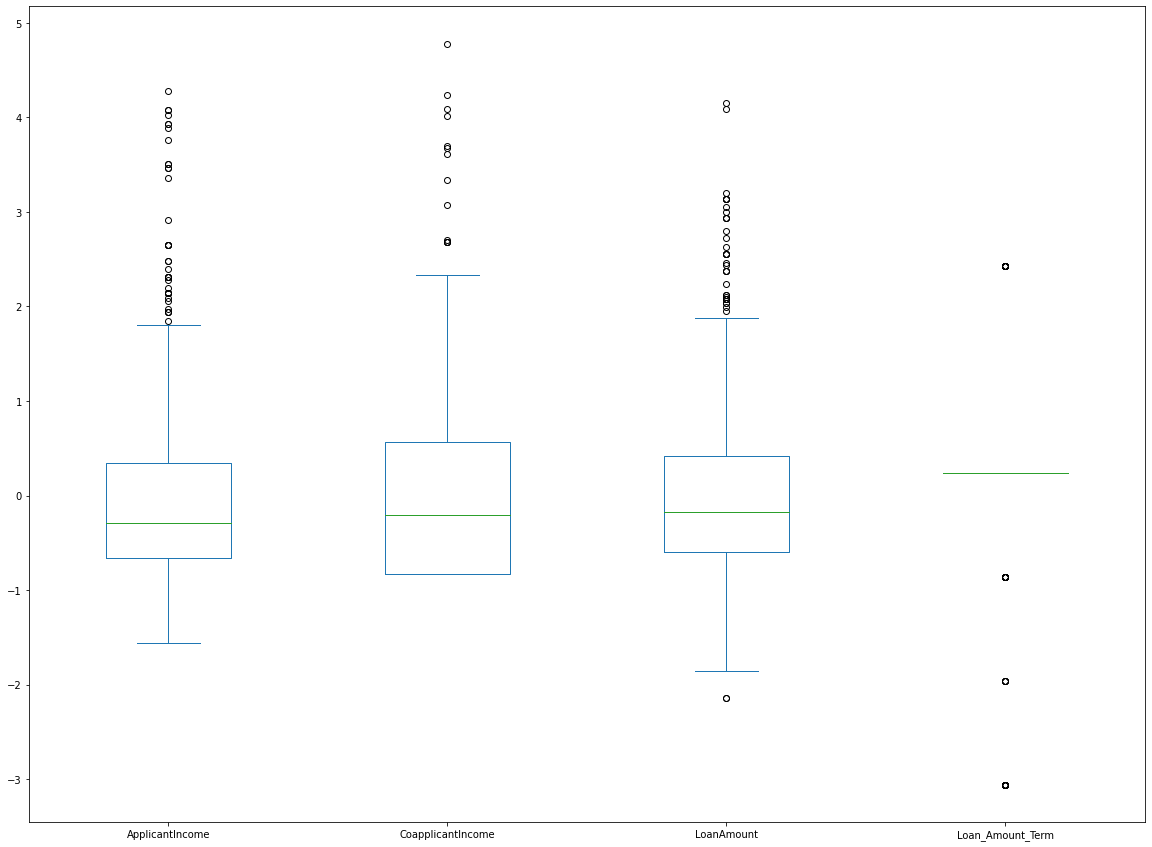

In [305]:
zscore(data[cont_col]).plot(kind='box',figsize=(20,15))

as we can see after using zscore we still have outliers, so we will use technique to remove the skewness and then see how the distribution looks like after applying those techniques

also we will remov the Loan_mount term colum, but the column still have so many outlier so it will better to remove that column from the model

In [306]:
data = data.drop(columns ='Loan_Amount_Term')
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
2,1,1,0,0,1,3000,0.0,66.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,1,2,1
5,1,1,2,0,1,5417,4196.0,267.0,1,2,1
6,1,1,0,1,0,2333,1516.0,95.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
40,1,0,0,0,0,3600,0.0,80.0,1,2,0
300,1,1,0,1,0,1800,2934.0,93.0,0,2,0
34,1,0,3,0,0,12500,3000.0,320.0,1,0,0
384,1,1,2,0,0,4566,0.0,100.0,1,2,0


In [359]:
# splitin the data into label and features
X = data.drop(columns='Loan_Status')
y = data['Loan_Status']

X.sample(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
596,1,1,2,1,1,6383,1000.0,187.0,1,0
173,1,1,0,0,0,5708,5625.0,187.0,1,1
275,1,1,1,0,0,2750,1842.0,115.0,1,1
39,1,0,0,1,0,3748,1668.0,110.0,1,1
47,1,1,0,0,0,5821,0.0,144.0,1,2
28,1,0,0,1,0,1442,0.0,35.0,1,2
54,0,1,1,0,1,11500,0.0,286.0,0,2
410,0,0,1,1,1,3867,0.0,62.0,1,1
351,1,0,0,0,0,8750,4167.0,308.0,1,0
548,0,0,0,0,0,5000,0.0,103.0,0,1


<AxesSubplot:>

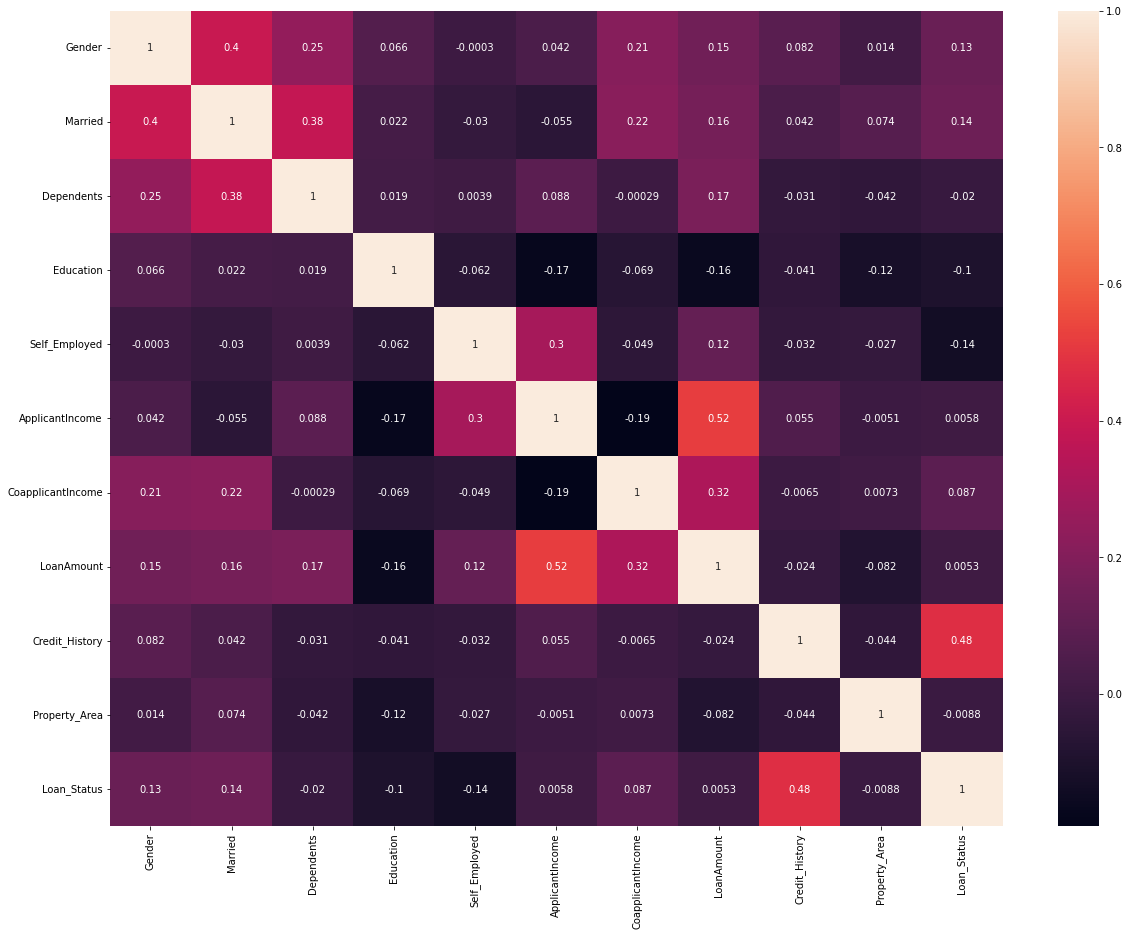

In [360]:
# no lets check if there is multicolinearity between the features

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

We cant find any multicolinearity problem, so we are good to proceed to check the skewness

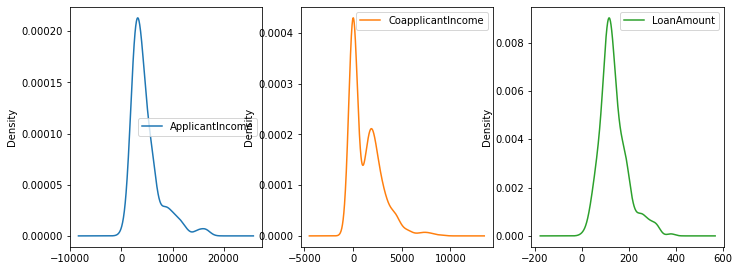

ApplicantIncome      1.821388
CoapplicantIncome    1.386260
LoanAmount           1.108167
dtype: float64


In [361]:
# lets see how the data is distributed for contineous column
X[cont_col].plot(kind='density',subplots=True,sharex=False,figsize=(20,15),layout=(3,5))
plt.show()
print(X[cont_col].skew())

In [363]:
X.ApplicantIncome = np.cbrt(X.ApplicantIncome)
X.CoapplicantIncome = np.cbrt(X.CoapplicantIncome)
X.LoanAmount = np.cbrt(X.LoanAmount)

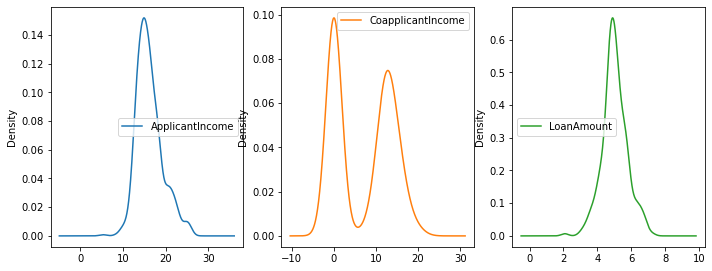

ApplicantIncome      0.750056
CoapplicantIncome    0.071467
LoanAmount          -0.007920
dtype: float64


In [364]:
X[cont_col].plot(kind='density',subplots=True,sharex=False,figsize=(20,15),layout=(3,5))
plt.show()
print(X[cont_col].skew())

we are able to remove the skewness from the data

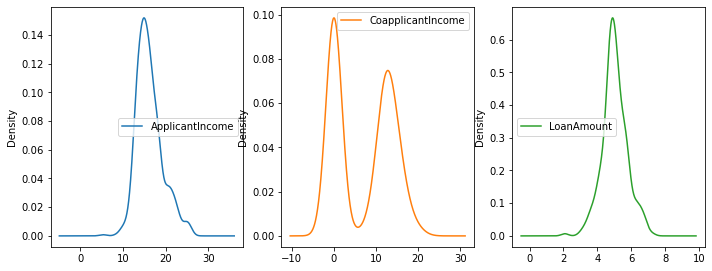

ApplicantIncome      0.750056
CoapplicantIncome    0.071467
LoanAmount          -0.007920
dtype: float64


In [365]:
X[cont_col].plot(kind='density',subplots=True,sharex=False,figsize=(20,15),layout=(3,5))
plt.show()
print(X[cont_col].skew())

# Scaling the data

In [366]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[ 0.50973064,  0.78213288, -0.77603108, ..., -1.34199274,
         0.48260334,  1.21242635],
       [ 0.50973064,  0.78213288, -0.77603108, ..., -0.13013511,
         0.48260334,  1.21242635],
       [ 0.50973064, -1.27855512, -0.77603108, ...,  0.24028724,
         0.48260334,  1.21242635],
       ...,
       [ 0.50973064, -1.27855512,  2.1128072 , ...,  2.46371018,
         0.48260334, -1.30854664],
       [ 0.50973064,  0.78213288,  1.14986111, ..., -0.52562127,
         0.48260334,  1.21242635],
       [ 0.50973064,  0.78213288, -0.77603108, ...,  1.34668971,
        -2.07209507, -1.30854664]])

# Training the data

All the preprocessing  and the scaling of the data has been done, now we will train the model

I will be using follwoing model for prediction:
    
    Logisitics Regression
    Knn
    DecsionTree
    Random Forest


###### Identifying best random state for logisitics regression

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc
# best the best random state for Logistic regrssion model
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LogisticRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.6637931034482759 random state - 0
Accurancy Score -  0.6982758620689655 random state - 1
Accurancy Score -  0.7068965517241379 random state - 2
Accurancy Score -  0.75 random state - 3
Accurancy Score -  0.7586206896551724 random state - 5
Accurancy Score -  0.7758620689655172 random state - 9
Accurancy Score -  0.7844827586206896 random state - 42
Accurancy Score -  0.7931034482758621 random state - 87
Accurancy Score -  0.8017241379310345 random state - 89


###### Confusion matrix and clssification report - Logistics Regression

In [368]:
#the random state from logisitics regression is 89, so we will use to generate confusion matrix and classification report
# we got best result from random forest classifier we will use that result
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=89)
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = lm.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 80.17241379310344 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.85      0.66      0.74        50
           1       0.78      0.91      0.84        66

    accuracy                           0.80       116
   macro avg       0.81      0.78      0.79       116
weighted avg       0.81      0.80      0.80       116

[[33 17]
 [ 6 60]]


###### Identifying best random state for KNN

In [369]:
# best the best random state for Logistic regrssion model
from sklearn.neighbors import KNeighborsClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = knn.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.6896551724137931 random state - 0
Accurancy Score -  0.75 random state - 2
Accurancy Score -  0.7586206896551724 random state - 7
Accurancy Score -  0.7672413793103449 random state - 8
Accurancy Score -  0.7844827586206896 random state - 12
Accurancy Score -  0.8103448275862069 random state - 30


###### Confusion matrix and clssification report - KNN

In [371]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=30)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = knn.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 81.03448275862068 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        47
           1       0.87      0.80      0.83        69

    accuracy                           0.81       116
   macro avg       0.80      0.81      0.81       116
weighted avg       0.82      0.81      0.81       116

[[39  8]
 [14 55]]


###### Identifying best random state for Decision Tree

In [372]:
# best the best random state for Decision tree model
from sklearn.tree import DecisionTreeClassifier

ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8275862068965517 random state - 0
Accurancy Score -  0.8448275862068966 random state - 3
Accurancy Score -  0.9137931034482759 random state - 6
Accurancy Score -  0.9224137931034483 random state - 21


###### Confusion matrix and clssification report - Decision Tree

In [374]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=21)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = dt.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 93.96551724137932 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       1.00      0.89      0.94        62

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.95      0.94      0.94       116

[[54  0]
 [ 7 55]]


###### Identifying best random state for Random Forest

In [375]:
# best the best random state for Logistic regrssion model
from sklearn.ensemble import RandomForestClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8879310344827587 random state - 0
Accurancy Score -  0.896551724137931 random state - 1
Accurancy Score -  0.9655172413793104 random state - 5


###### Confusion matrix and clssification report - Random Forest

In [395]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=5)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 96.55172413793103 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.98      0.95      0.97        63

    accuracy                           0.97       116
   macro avg       0.96      0.97      0.97       116
weighted avg       0.97      0.97      0.97       116

[[52  1]
 [ 3 60]]


##### ROC AUC Curve

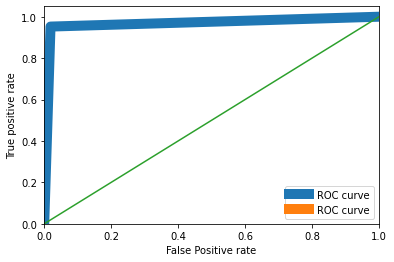

In [378]:
fpr,tpr,th = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,roc_auc,lw=10,label='ROC curve' % roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

##### Hyper Parameter tuning

In [380]:
from sklearn.model_selection import GridSearchCV
param = {'criterion':['gini','entropy'],'min_samples_leaf': range(1,5),'min_samples_split': range(1,5),'max_depth':range(1,5)}

grd = GridSearchCV(rf, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [394]:
rf = RandomForestClassifier(criterion='entropy', max_depth=85, min_samples_leaf=96,min_samples_split=7)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_pred,y_test)
pacc

0.5344827586206896

we have not been able to improve the result by parameter tuning so we will use the original model to prdict the result

In [396]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=5)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 97.41379310344827 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.98      0.97      0.98        63

    accuracy                           0.97       116
   macro avg       0.97      0.97      0.97       116
weighted avg       0.97      0.97      0.97       116

[[52  1]
 [ 2 61]]


##### Saving the best Model - Random Forest

In [397]:
import pickle

filename = 'final_model.pkl'
pickle.dump(rf, open('rf.pkl', 'wb'))